In [85]:
#Primijenite scikit-learn kmeans metodu za kvantizaciju boje na slici. Proučite kod 5.2. iz priloga vježbe te ga primijenite
#za kvantizaciju boje na slici example_grayscale.png koja se nalazi u
#rusu_lv_2019_20/LV5/resources/. Mijenjajte broj klastera. Što primjećujete? Izračunajte kolika se
#kompresija ove slike može postići ako se koristi 10 klastera.
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
image = mpimg.imread('img.png')
image_input = image.reshape((-1, 1))

In [86]:
kmeans = KMeans(n_clusters = 10, n_init = 1)
kmeans.fit(image_input)
indices = kmeans.predict(image_input)
values = kmeans.cluster_centers_.squeeze()
compressed = np.choose(indices, values)
compressed.shape = image.shape

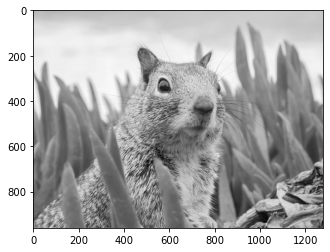

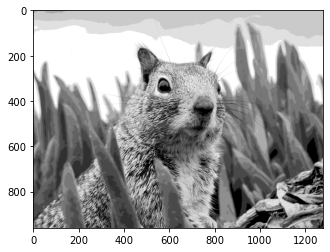

In [87]:
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.figure(2)
plt.imshow(compressed, cmap='gray')
plt.show()

In [88]:
plt.imsave('compressed.png', compressed)

In [89]:
size_uncompressed = Path('img.png').stat().st_size
size_compressed = Path('compressed.png').stat().st_size
compression_on_disk = size_compressed/size_uncompressed
print(compression_on_disk)

0.8053245060877645


In [90]:
value_of_pixel_uncompressed = np.log2(256) #bits
value_of_pixel_compressed = np.ceil(np.log2(values.size))
size_uncompressed = image.shape[0] * image.shape[1] * value_of_pixel_uncompressed
size_compressed = compressed.shape[0] * compressed.shape[1] * value_of_pixel_compressed
compression = size_uncompressed/size_compressed
print(compression)

2.0
